In [132]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [133]:
dataset_name= 'thyroidDF'
df = pd.read_csv(f'data/{dataset_name}.csv')

In [134]:
print(df.dtypes)
df.head()

age                      int64
sex                     object
on_thyroxine            object
query_on_thyroxine      object
on_antithyroid_meds     object
sick                    object
pregnant                object
thyroid_surgery         object
I131_treatment          object
query_hypothyroid       object
query_hyperthyroid      object
lithium                 object
goitre                  object
tumor                   object
hypopituitary           object
psych                   object
TSH_measured            object
TSH                    float64
T3_measured             object
T3                     float64
TT4_measured            object
TT4                    float64
T4U_measured            object
T4U                    float64
FTI_measured            object
FTI                    float64
TBG_measured            object
TBG                    float64
referral_source         object
target                  object
patient_id               int64
dtype: object


,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,NaN,f,NaN,f,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [135]:
boolean_columns = df.columns[df.isin(['t', 'f']).all()]
df[boolean_columns] = df[boolean_columns].applymap(lambda x: 1 if x == 't' else 0)

df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.3,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,other,-,840801013
1,29,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.6,1,1.9,1,128.0,0,NaN,0,NaN,0,NaN,other,-,840801014
2,41,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,11.0,other,-,840801042
3,36,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,26.0,other,-,840803046
4,32,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,36.0,other,S,840803047


In [136]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [137]:
hyperthyroid = {'A', 'B', 'C', 'D'}
hypothyroid = {'E', 'F', 'G', 'H'}

def classify_diagnosis(diagnosis):
    
    letters = set(diagnosis.replace('|', ''))
    if letters & hyperthyroid:
        return 2
    
    if letters & hypothyroid:
        return 0
    
    return 1

df['target'] = df['target'].apply(classify_diagnosis)
df['target'].unique()

array([1, 0, 2], dtype=int64)

In [138]:
df.drop(['patient_id'],axis='columns', inplace=True)

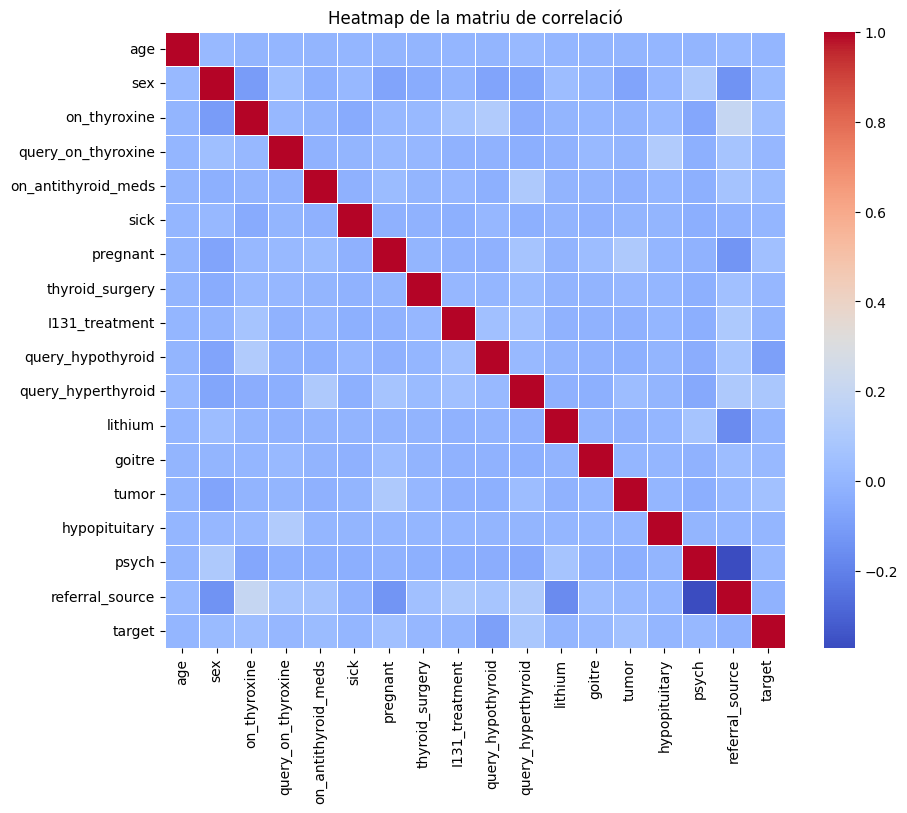

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

mesures = ['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
valors = ['TSH', 'T3','TT4','T4U','FTI', 'TBG']
df_cleared = df.drop(mesures+valors,axis='columns')
df_cleared = df_cleared.dropna()
numeric_features = df_cleared.select_dtypes(np.number).keys()
non_numeric = [k for k in df_cleared.keys() if k not in numeric_features]
df_cleared.loc[:,non_numeric] = df_cleared.loc[:,non_numeric].apply(LabelEncoder().fit_transform)

correlation_matrix = df_cleared.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

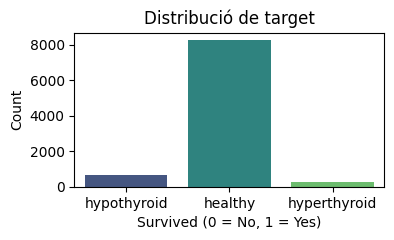

In [140]:
# Distribució de la variable 'Survived'
plt.figure(figsize=(4, 2))
sns.countplot(x='target', data=df, palette='viridis')
plt.title('Distribució de target')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(ticks=[1, 0, 2], labels=['healthy','hypothyroid','hyperthyroid'])
plt.show()

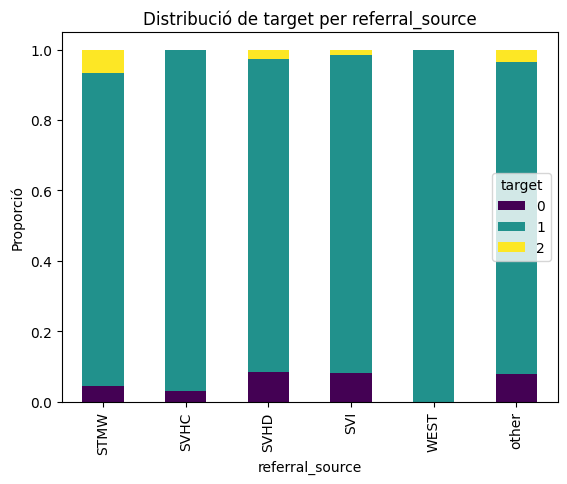

In [141]:
# Calcula les proporcions per a cada combinació de referral_source i target
data_pivot = df.groupby(['referral_source', 'target']).size().unstack(fill_value=0)

# Normalitza perquè cada referral_source sumi 100%
data_pivot = data_pivot.div(data_pivot.sum(axis=1), axis=0)

# Dibuixa un gràfic de barres apilades
data_pivot.plot(kind='bar', stacked=True, colormap='viridis')
plt.ylabel('Proporció')
plt.title('Distribució de target per referral_source')
plt.show()


In [142]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

sex    0.033471
TSH    0.091801
T3     0.283908
TT4    0.048190
T4U    0.088203
FTI    0.087440
TBG    0.961949
dtype: float64

In [143]:
df['referral_source'].unique()

array(['other', 'SVI', 'SVHC', 'STMW', 'SVHD', 'WEST'], dtype=object)

In [144]:
df['referral_source'].value_counts()


referral_source
other    5493
SVI      2394
SVHC      956
STMW      255
SVHD       71
WEST        3
Name: count, dtype: int64

In [145]:
dummies_referral_source = pd.get_dummies(df['referral_source'], dtype='int',drop_first=False)
df = pd.concat([df, dummies_referral_source], axis=1)
df = df.drop(['referral_source','WEST'], axis="columns")

In [146]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target,STMW,SVHC,SVHD,SVI,other
0,29,F,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.3,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1
1,29,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.6,1,1.9,1,128.0,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1
2,41,F,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,11.0,1,0,0,0,0,1
3,36,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,26.0,1,0,0,0,0,1
4,32,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,36.0,1,0,0,0,0,1


In [147]:
df['age'].nsmallest(5)

456     1
1142    1
1267    1
1921    1
3300    1
Name: age, dtype: int64

In [148]:
df['age'].nlargest(5)

8105    65526
6392    65512
5710    65511
2976      455
790        97
Name: age, dtype: int64

In [149]:
df = df[df['age'] < 100]



In [150]:
# Omplir NaNs de 'sexe' amb 'F' si 'pregnant' és 1
df.loc[(df['sex'].isna()) & (df['pregnant'] == 1), 'sex'] = 'F'

In [151]:
dist_nan = df['target'].value_counts(normalize=True).sort_index()
df.dropna(subset=['sex'], inplace=True)
dist_not_nan = df['target'].value_counts(normalize=True).sort_index()

print("Distribució target amb NaNs:")
print(dist_nan)
print("\nDistribució target sense NaNs:")
print(dist_not_nan)

Distribució target amb NaNs:
target
0    0.072753
1    0.900960
2    0.026287
Name: proportion, dtype: float64

Distribució target sense NaNs:
target
0    0.072420
1    0.902200
2    0.025381
Name: proportion, dtype: float64


In [152]:
#df.dropna(subset=['sex'], inplace=True)

In [153]:
dummies_sex = pd.get_dummies(df['sex'], dtype='int',drop_first=False)
df = pd.concat([df, dummies_sex], axis=1)
df = df.drop(['sex'], axis="columns")
df.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,target,STMW,SVHC,SVHD,SVI,other,F,M
0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.3,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1,1,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.6,1,1.9,1,128.0,0,NaN,0,NaN,0,NaN,1,0,0,0,0,1,1,0
2,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,11.0,1,0,0,0,0,1,1,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,26.0,1,0,0,0,0,1,1,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,1,36.0,1,0,0,0,0,1,1,0


In [154]:
nan_percentage = df.isna().mean()
nan_columns = nan_percentage[nan_percentage > 0]
nan_columns

TSH    0.091709
T3     0.284377
TT4    0.047377
T4U    0.087422
FTI    0.086633
TBG    0.962662
dtype: float64

In [155]:
mesures = ['TSH_measured', 'T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured']
valors = ['TSH', 'T3','TT4','T4U','FTI', 'TBG']
for i in range(len(mesures)):
    no_mesured = df[df[mesures[i]] == 0]
    is_theory_correct = no_mesured[valors[i]].isna().all()
    print(is_theory_correct)


True
True
True
True
True
True


In [156]:
df.drop(mesures,axis='columns',inplace=True)

In [157]:
df_fill_na = df.copy()
valors_maxims_normals = [40,6,150,1.3,165,39]
for i,j in zip(valors,valors_maxims_normals):
    df_fill_na[i]/=j
df_fill_na.head(10)

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,STMW,SVHC,SVHD,SVI,other,F,M
0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0075,NaN,NaN,NaN,NaN,NaN,1,0,0,0,0,1,1,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0400,0.316667,0.853333,NaN,NaN,NaN,1,0,0,0,0,1,1,0
2,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.282051,1,0,0,0,0,1,1,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.666667,1,0,0,0,0,1,1,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.923077,1,0,0,0,0,1,1,0
5,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.666667,1,0,0,0,0,1,1,0
6,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,0.538462,1,0,0,0,0,1,1,0
7,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0175,0.433333,0.773333,NaN,NaN,NaN,1,0,0,0,1,0,1,0
8,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0300,0.300000,0.506667,NaN,NaN,NaN,1,0,0,0,0,1,1,0
9,28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0475,0.283333,0.553333,NaN,NaN,NaN,1,0,0,0,0,1,1,0


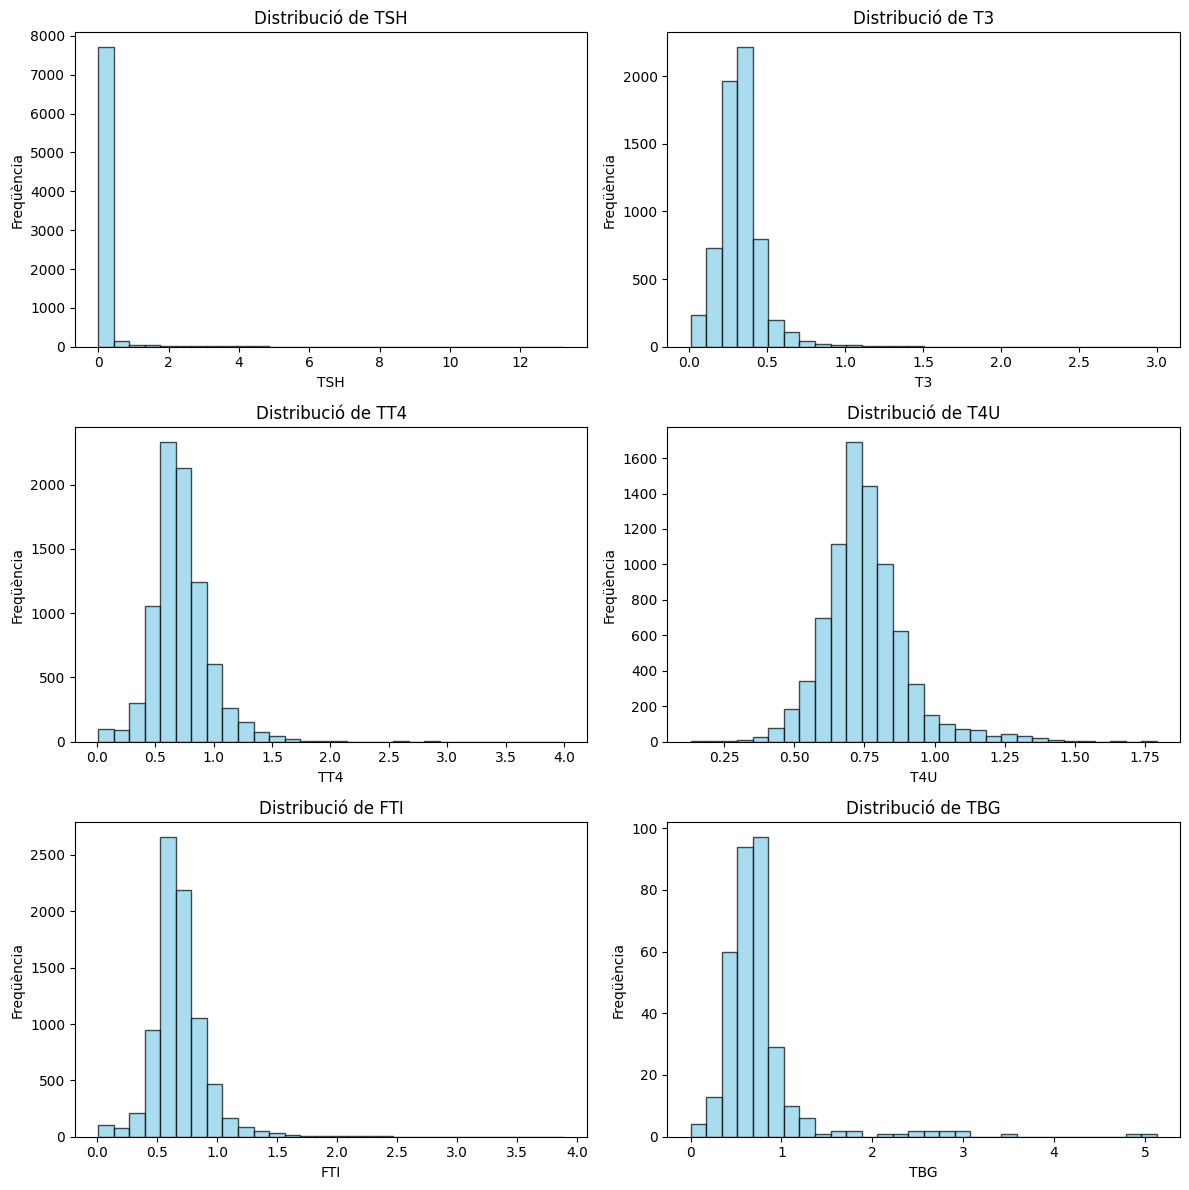

In [158]:

# Tornar a crear les gràfiques, aquesta vegada partint del dataframe
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, column in zip(axes, valors):
    ax.hist(df_fill_na[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribució de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

In [159]:
for i in range(len(valors)):
    print(df_fill_na[valors[i]].min(), df_fill_na[valors[i]].max())

0.000125 13.25
0.008333333333333333 3.0
0.013333333333333334 4.0
0.13076923076923078 1.7923076923076924
0.008484848484848484 3.890909090909091
0.002564102564102564 5.128205128205129


In [160]:
for i in valors:
    std_dev = df[i].std()  
    df_fill_na[i] = df_fill_na[i].fillna(-1)
df_fill_na.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,STMW,SVHC,SVHD,SVI,other,F,M
0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0075,-1.000000,-1.000000,-1.0,-1.0,-1.000000,1,0,0,0,0,1,1,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0400,0.316667,0.853333,-1.0,-1.0,-1.000000,1,0,0,0,0,1,1,0
2,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,-1.0000,-1.000000,-1.000000,-1.0,-1.0,0.282051,1,0,0,0,0,1,1,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0000,-1.000000,-1.000000,-1.0,-1.0,0.666667,1,0,0,0,0,1,1,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.0000,-1.000000,-1.000000,-1.0,-1.0,0.923077,1,0,0,0,0,1,1,0


In [161]:
for i in valors:
    df_fill_na = df_fill_na[df_fill_na[i]<5]

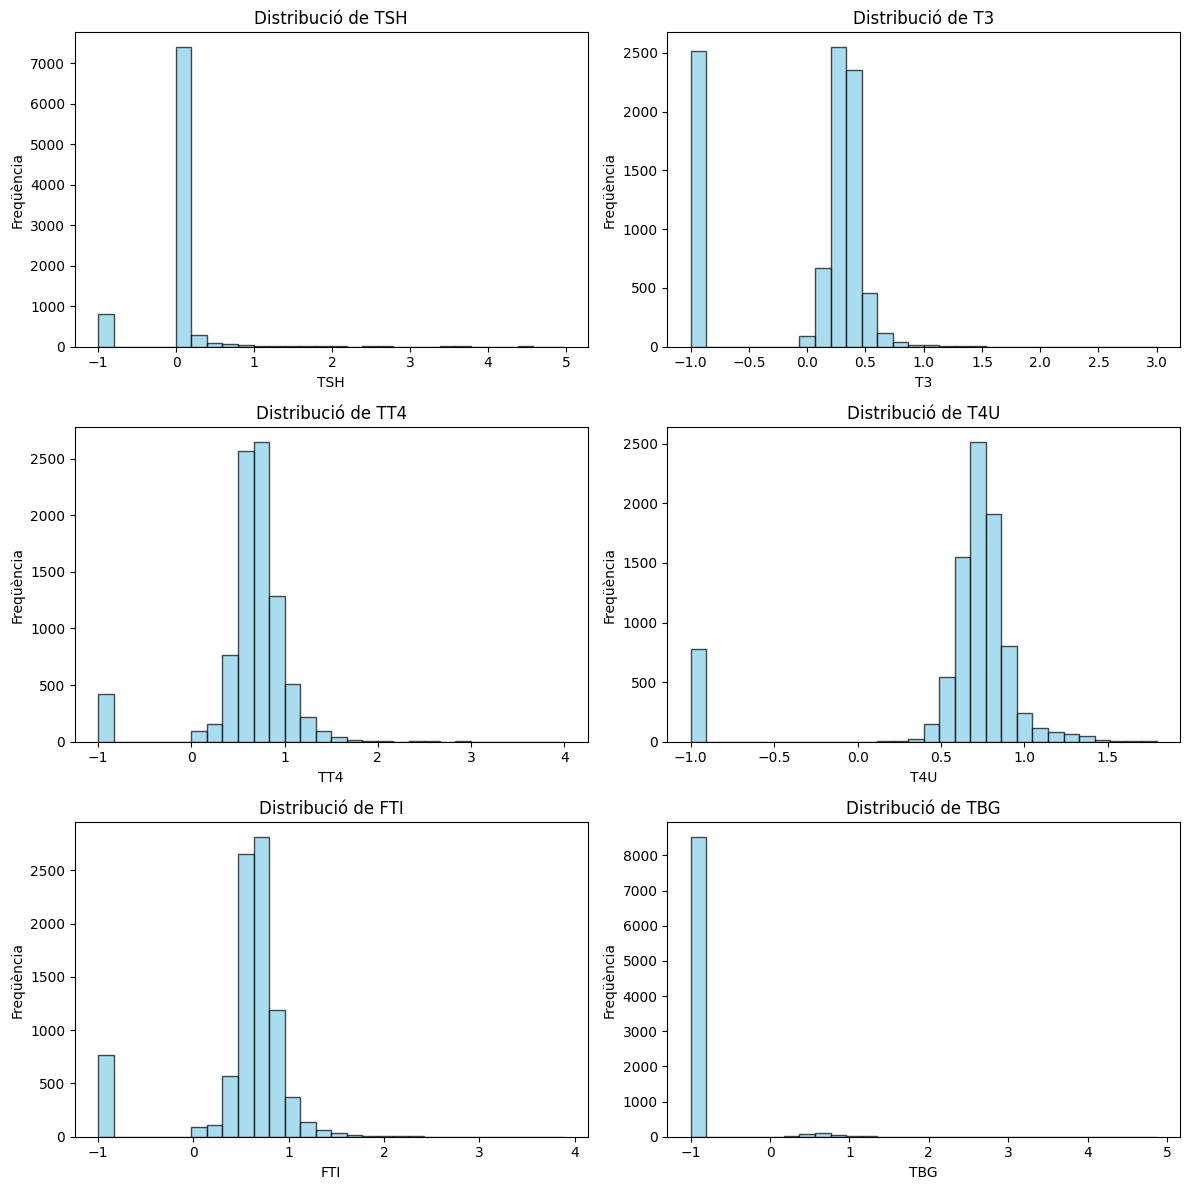

In [162]:
import matplotlib.pyplot as plt

# Tornar a crear les gràfiques, aquesta vegada partint del dataframe
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for ax, column in zip(axes, valors):
    ax.hist(df_fill_na[column], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribució de {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Freqüència')

plt.tight_layout()
plt.show()

In [163]:
df_fill_na['age'] /= 100

In [164]:
df_fill_na.dropna(inplace=True)

In [165]:
print(df_fill_na['target'].value_counts())

target
1    7997
0     621
2     225
Name: count, dtype: int64


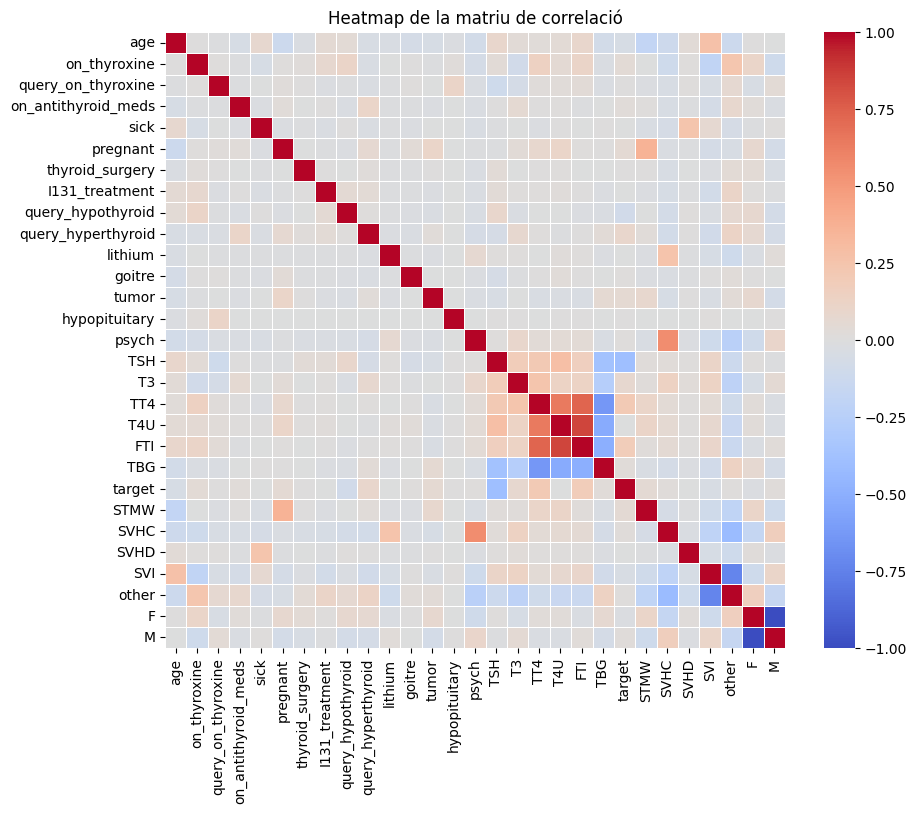

In [166]:
import seaborn as sns

# Calcular la matriu de correlació i mostrar un heatmap sense anotacions
correlation_matrix = df_fill_na.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

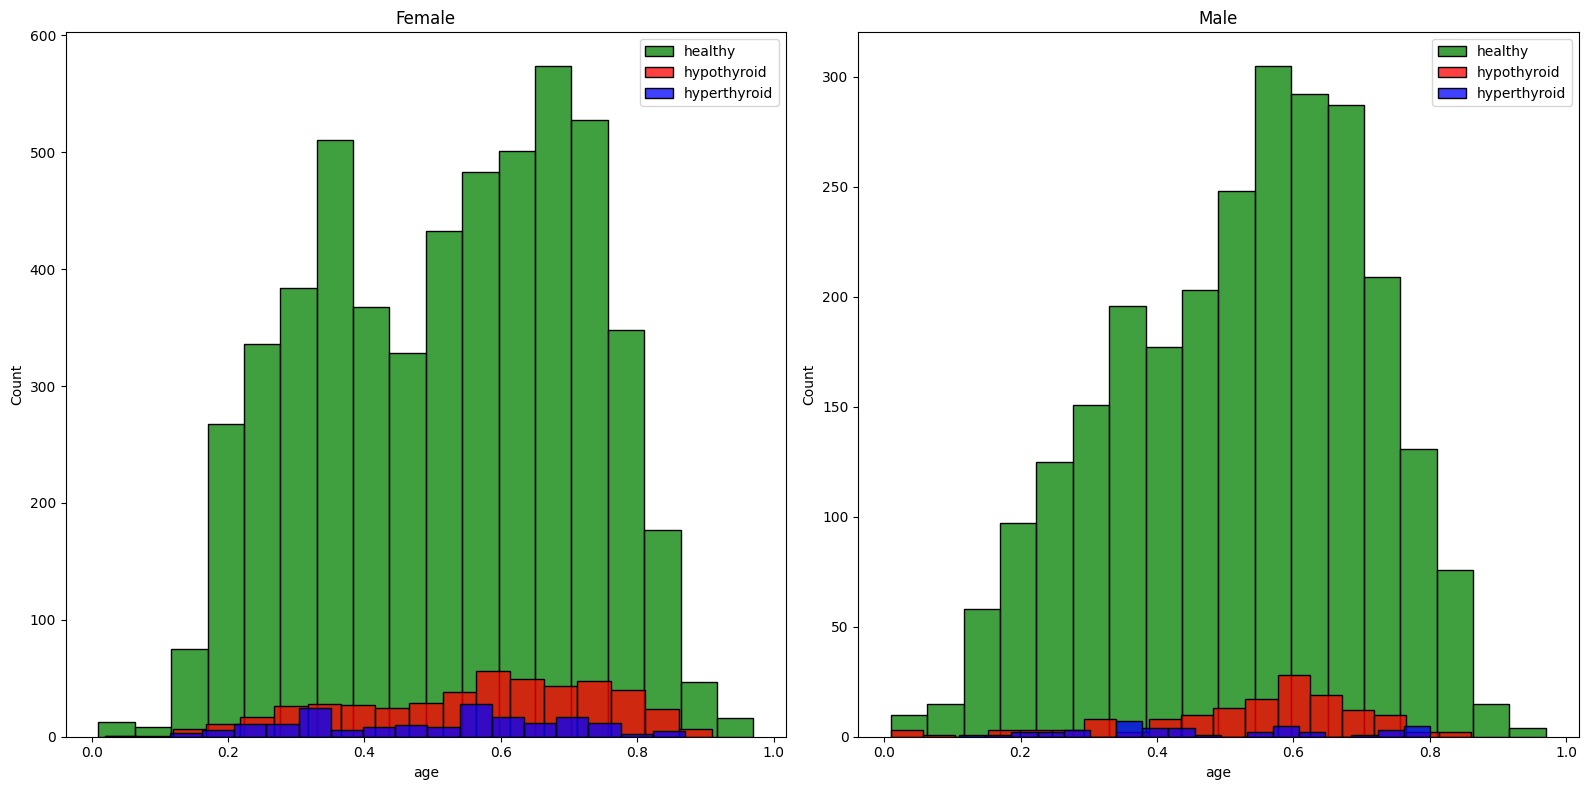

In [167]:
# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

# Filtrar dades per sexe
women = df_fill_na[df_fill_na['M'] == 0]
men = df_fill_na[df_fill_na['M'] == 1]

# Colors i targets
targets_numeric = [1,0,2]
colors = ['green', 'red', 'blue']
target_categorical=['healthy','hypothyroid','hyperthyroid']

# Subplot per a dones
for n, color,c in zip(targets_numeric, colors,target_categorical):
    sns.histplot(
        data=women[women['target'] == n],
        x="age",
        bins=18,
        label=c,
        ax=axes[0],
        color=color,
        kde=False
    )
axes[0].legend()
axes[0].set_title('Female')

# Subplot per a homes
for n, color,c in zip(targets_numeric, colors,target_categorical):
    sns.histplot(
        data=men[men['target'] == n],
        x="age",
        bins=18,
        label=c,
        ax=axes[1],
        color=color,
        kde=False
    )
axes[1].legend()
axes[1].set_title('Male')

# Mostrar la gràfica
plt.tight_layout()
plt.show()


In [168]:
from sklearn.model_selection import train_test_split
target_att = 'target'
attributes = [k for k in df.keys() if k!= target_att]
X = df_fill_na[attributes]
y = df_fill_na[[target_att]]
X_train_val_fillna, X_test_fillna, y_train_val_fillna, y_test_fillna = train_test_split(X, y, test_size=0.1, random_state=42)

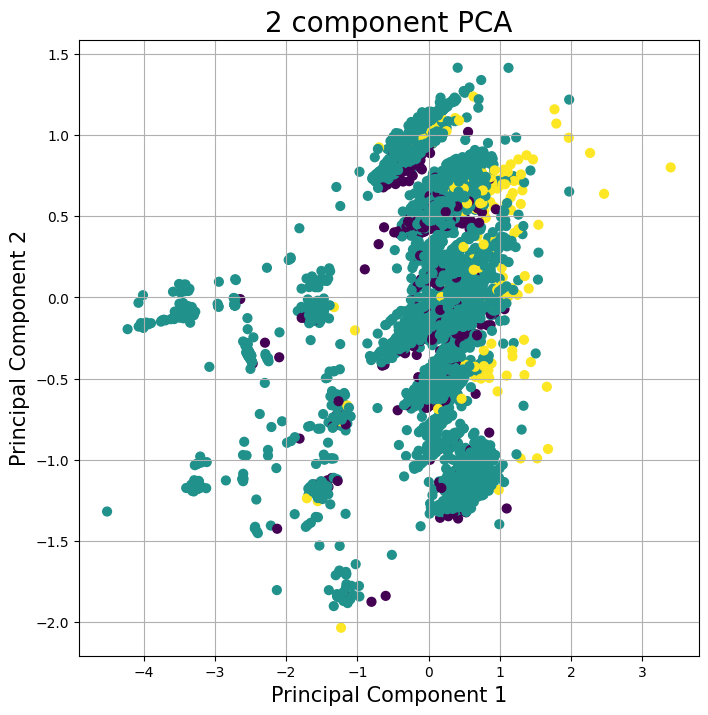

In [169]:
from sklearn.decomposition import PCA

# Provem PCA amb 2 components
pca = PCA(n_components=2)
y_pca = np.array(y_train_val_fillna)
X_data_pca_2 = pca.fit_transform(X_train_val_fillna)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

In [170]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix

X_train, X_val, y_train, y_val = train_test_split(X_train_val_fillna, y_train_val_fillna, test_size=0.2, random_state=42)
ovo_model = RandomForestClassifier()
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)




0.9050030637780025
0.9824120603015075
Matriu de confusió:
 [[ 124    4    0]
 [   4 1409    1]
 [   0   19   31]]


In [171]:
def classificacio_per_defecte(X, y, PRC, it, base_classifiers):
    acc_r = np.zeros((it, len(base_classifiers)))

    random_state = 20
    for i in range(it):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=PRC, random_state=random_state * (i + 1))
        for j, model in enumerate(base_classifiers.values()):
            model.fit(X_train, y_train)

            yhat = model.predict(X_test)
            acc_r[i][j] = f1_score(y_test, yhat, average='macro')

    return acc_r



In [172]:
def save_df(acc_r,name_dataset,base_classifiers):
    models = list(base_classifiers.keys())

    data_for_saving = []
    for j in range(acc_r.shape[1]):  
        for i in range(acc_r.shape[0]):  
            precisio = acc_r[i, j]
            
            data_for_saving.append({
                'Model': models[j],
                'Mostra': i + 1,  
                'Precisio': precisio
            })

    df_results = pd.DataFrame(data_for_saving)

    df_results.to_csv(f'./execucions/resultats_per_model_default_{name_dataset}.csv', index=False)

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import SVC


random_state=20
base_classifiers = {
    'Logistic Regression OvO': OneVsOneClassifier(LogisticRegression(random_state=random_state)),
    'Logistic Regression OvR': OneVsRestClassifier(LogisticRegression(random_state=random_state)),
    'SVC OvO': OneVsOneClassifier(SVC(random_state=random_state)),
    'SVC OvR': OneVsRestClassifier(SVC(random_state=random_state)),
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(random_state=random_state)
}
PRC = 0.3
f1_dfna = classificacio_per_defecte(X_train_val_fillna,y_train_val_fillna,PRC,10,base_classifiers)
save_df(f1_dfna,'df_fillna',base_classifiers)
f1_dfna = pd.read_csv('./execucions/resultats_per_model_default_df_fillna.csv')

In [174]:
def plot_data(acc_r):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=acc_r, x="Model", y="Precisio")
    plt.title("Comparativa de f1_score per Model")
    plt.ylabel("f1_score")
    plt.xlabel("Model")
    plt.legend(title="Tipus")
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


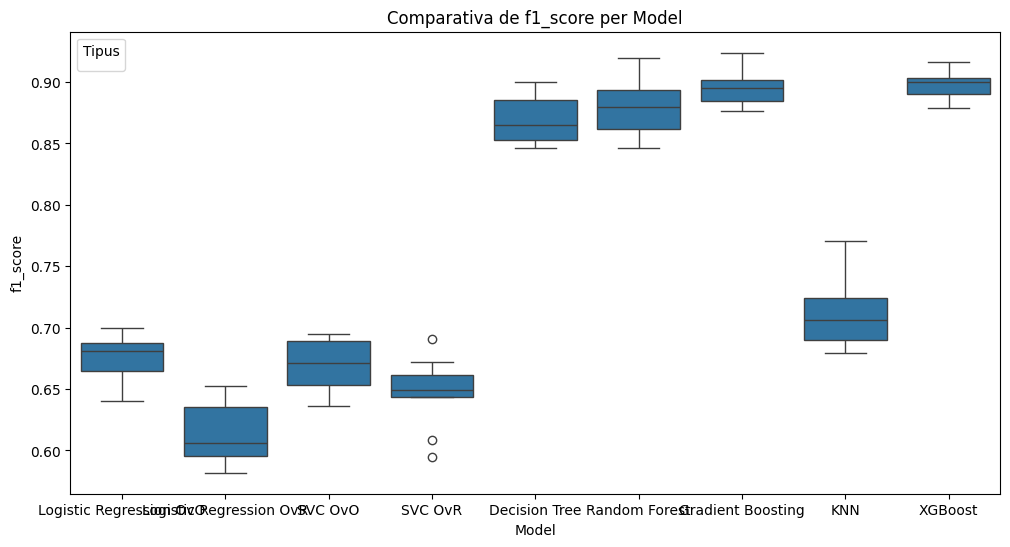

In [175]:
plot_data(f1_dfna)

In [176]:

from sklearn.feature_selection import SelectFromModel


selected_data = {}

def select_important_features(model, X_train, y_train, threshold='mean'):
    model.fit(X_train, y_train)
    if hasattr(model, 'feature_importances_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    elif hasattr(model, 'coef_'):
        selector = SelectFromModel(model, threshold=threshold, prefit=True)
        mask = selector.get_support()
    else:
        print(f" --- El model {model.__class__.__name__} no suporta selecció de característiques. S'afageixen totes les variables---")
        mask = np.ones(X_train.shape[1], dtype=bool)
    X_norm_selected = X_train[:, mask] if isinstance(X_train, np.ndarray) else X_train.loc[:, mask]
    return X_norm_selected, mask


for name, model in base_classifiers.items():
    print(f"Seleccionant característiques importants per {name}")
    X_norm_selected, mask = select_important_features(model, X_train_val_fillna, y_train_val_fillna)
    selected_data[f'{name}'] = X_norm_selected
    selected_data[f'{name}_mask'] = mask

Seleccionant característiques importants per Logistic Regression OvO
 --- El model OneVsOneClassifier no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants per Logistic Regression OvR
 --- El model OneVsRestClassifier no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants per SVC OvO
 --- El model OneVsOneClassifier no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants per SVC OvR
 --- El model OneVsRestClassifier no suporta selecció de característiques. S'afageixen totes les variables---
Seleccionant característiques importants per Decision Tree
Seleccionant característiques importants per Random Forest
Seleccionant característiques importants per Gradient Boosting
Seleccionant característiques importants per KNN
 --- El model KNeighborsClassifier no suporta selecció de característiques. S'afageixen 

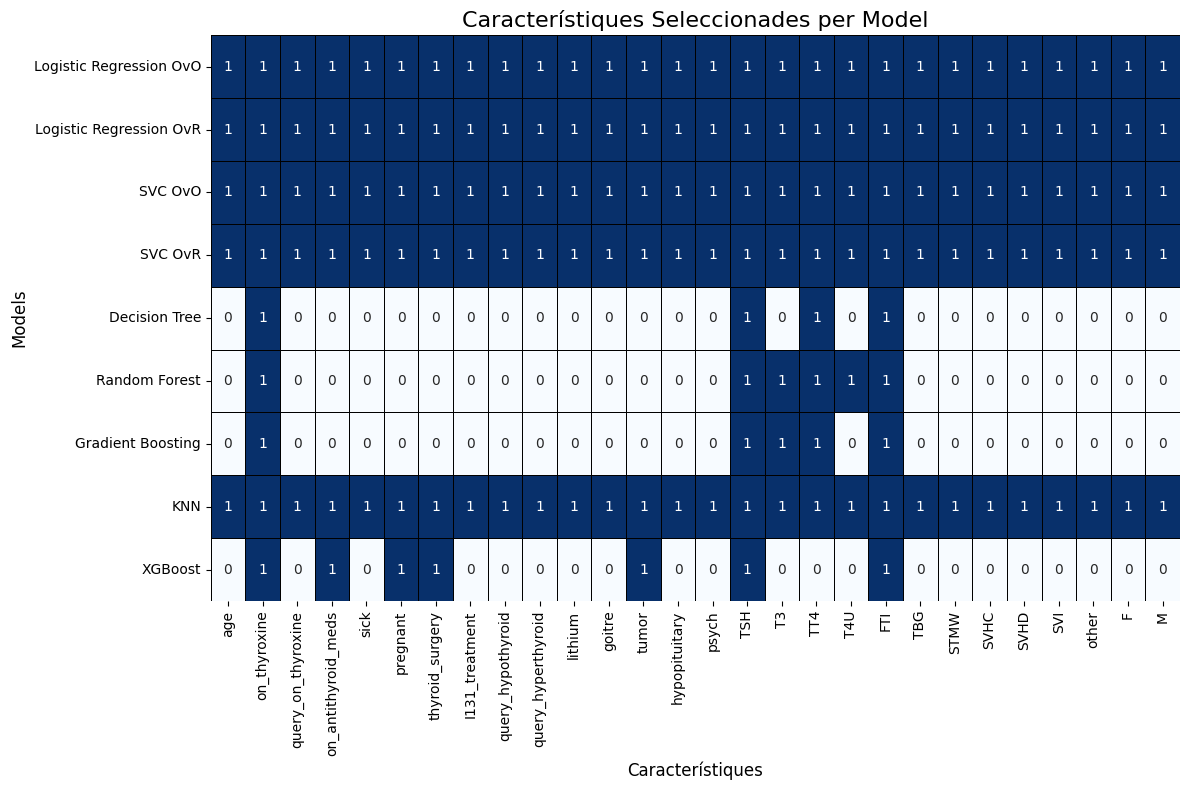

In [177]:

classifier_names = base_classifiers.keys()
feature_selection_df = pd.DataFrame(
    index=classifier_names, 
    columns=attributes
)
for model_name in classifier_names:
    mask = selected_data[f'{model_name}_mask']
    feature_selection_df.loc[model_name] = mask

feature_selection_df = feature_selection_df.astype(int)

plt.figure(figsize=(12, 8))
sns.heatmap(feature_selection_df, cmap='Blues', annot=True, cbar=False, 
            linewidths=.5, linecolor='black')
plt.title('Característiques Seleccionades per Model', fontsize=16)
plt.xlabel('Característiques', fontsize=12)
plt.ylabel('Models', fontsize=12)

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

In [178]:
selected_features_models = {
    'Decision Tree': DecisionTreeClassifier(random_state=random_state),
    'Random Forest': RandomForestClassifier(random_state=random_state),
    'Gradient Boosting': GradientBoostingClassifier(random_state=random_state),
    'XGBoost': XGBClassifier(random_state=random_state)
}
it = 10
acc_r = np.zeros((it, len(selected_features_models)))

random_state = 20
for i in range(it):
    j=0
    for name, model in selected_features_models.items():
        X_train, X_test, y_train, y_test = train_test_split(selected_data[name], y_train_val_fillna, test_size=PRC, random_state=random_state * (i + 1))
        model.fit(X_train, y_train)

        yhat = model.predict(X_test)
        acc_r[i][j] = f1_score(y_test, yhat, average='macro')
        j += 1 


In [179]:
#save_df(acc_r,'selected_features',selected_features_models)
#s_f = pd.read_csv('./execucions/resultats_per_model_default_selected_features.csv')
#plot_data(s_f)

In [180]:
# Paràmetres pel Logistic Regressor
lr_param_grid = {
    'estimator__random_state' : [random_state],  
    'estimator__penalty' : ['l2', 'l1'], 
    'estimator__solver' : ['lbfgs', 'liblinear'],  
    'estimator__C' : [0.01, 0.1, 1.0, 10.0, 100.0],
}

svc_param_grid = {'estimator__random_state' : [random_state],
                  'estimator__C' : [0.5, 1.0, 2.0, 4.0],
                  'estimator__gamma' : ['auto'],
                  'estimator__kernel' : ['rbf', 'linear', 'poly', 'sigmoid'],
                  'estimator__shrinking' : [True, False]}


# Paràmetres pel DTC
dtc_param_grid = {'random_state' : [random_state],
                  'criterion' : ['gini'],
                  'max_depth' : [None, 3, 5, 7, 10],
                  'min_samples_leaf' : [1, 5, 10], 
                  'min_samples_split' : [2, 5, 10],
                  'max_features': [None, 1, 2, 3, 4]}

# Paràmetres pel RFC
rfc_param_grid = {'random_state': [random_state],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [None, 2, 3, 4],
                  'max_depth': [None, 10, 20, 30],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4],
                  'class_weight': [None, 'balanced'],
}

# Paràmetres pel GBC
gbc_param_grid = {
    'random_state': [random_state],
    'loss': ['log_loss'], 
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': ['sqrt', 'log2']
}



# Paràmetres pel KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [30, 40, 50],
    'p': [1, 2],
    'metric': ['euclidean', 'manhattan', 'chebyshev'],
}

# Paràmetres pel XGBoost
xgb_param_grid = {
    'random_state': [random_state],
    'n_estimators': [100, 200, 300],  
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  
    'max_depth': [3, 5, 7, 10], 
    'min_child_weight': [1, 3, 5],  
    'subsample': [0.6, 0.8, 1.0],  
}



In [181]:
param_grid_list = {
    'Logistic Regression OvO': lr_param_grid, 
    'Logistic Regression OvR': lr_param_grid, 
    'SVC OvO': svc_param_grid,
    'SVC OvR': svc_param_grid,
    'Decision Tree': dtc_param_grid, 
    'Random Forest': rfc_param_grid, 
    'Gradient Boosting': gbc_param_grid,
    'KNN': knn_param_grid,
    'XGBoost': xgb_param_grid
}

In [182]:
import time
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer

def cerca_hyperparametres(X,y,base_classifiers,splits,dataset_name,param_grid_list):
    random_state = 42

    kfold = StratifiedKFold(n_splits=splits, random_state=random_state, shuffle=True)

    for name, model in base_classifiers.items():
        results = []

        start_time = time.time()

        param_grid = param_grid_list[name]

        gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=kfold, 
                            scoring=make_scorer(f1_score, average='macro'), n_jobs=-1)
        gs.fit(X, y)
        mean_f1_best_model = gs.best_score_
        best_params = gs.best_params_


        end_time = time.time()
        calc_time = end_time - start_time

        results.append({
            'Classifier': name,
            'Mean Test Score (F1)': mean_f1_best_model,
            'Execution Time (s)': calc_time,  
            'Best Parameters': best_params,
            'Best Estimator': gs.best_estimator_  
        })


        print(f'Classifier: {type(model).__name__}, Mean Test Score: {mean_f1_best_model:.4f}, Time: {calc_time:.2f}s')

        results_df = pd.DataFrame(results)
        results_df.to_csv(f'./execucions/{name}_hyperparameters_search_results_{dataset_name}.csv', index=False)


In [183]:
#cerca_hyperparametres(X_train_val_fillna,y_train_val_fillna,base_classifiers,10,'df_fillna',param_grid_list)

In [184]:
#for name, model in selected_features_models.items():
    #cerca_hyperparametres(selected_data[name],y_train_val_fillna,{name: model},10,'selected_features',param_grid_list)

In [185]:
def get_best_model_cerca_hyperparametres(base_classifiers,dataset_name):
    best_model=LogisticRegression()
    f1=0
    for name, model in base_classifiers.items():
        l=pd.read_csv(f'./execucions/{name}_hyperparameters_search_results_{dataset_name}.csv')
        l = l.loc[l['Mean Test Score (F1)'].idxmax()]
        if f1 < l['Mean Test Score (F1)']:
            f1 = l['Mean Test Score (F1)']
            best_params = eval(l['Best Parameters'])
            best_model = model
            best_model.set_params(**best_params)
    return best_model


In [186]:
best_model_dfna = get_best_model_cerca_hyperparametres(base_classifiers,'df_fillna')
best_model_dfna

RandomForestClassifier(criterion='entropy', max_features=None,
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=20)

In [187]:
def passar_a_intervals(df,hormones,intervals):
    def classificar_h(h,interval):
        if pd.isna(h):  
            return [0, 0, 0]
        elif h < interval[0]:
            return [1, 0, 0]
        elif h < interval[1]:
            return [0, 1, 0]
        else:
            return [0, 0, 1]


    for hormona,interval in zip(hormones,intervals):
        df[[f'{hormona} Baix', f'{hormona} Normal', f'{hormona} Alt']] = df[hormona].apply(lambda x: pd.Series(classificar_h(x,interval)))
        df.drop([hormona],axis='columns',inplace=True)
    return df

intervals=[[0.26,5.6],
            [1.8,4.6],
            [60,150],
            [0.7,1.3],
            [60,165],
            [13,39],
]
df_intervals = passar_a_intervals(df.copy(),valors,intervals)

df_intervals.head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target,STMW,SVHC,SVHD,SVI,other,F,M,TSH Baix,TSH Normal,TSH Alt,T3 Baix,T3 Normal,T3 Alt,TT4 Baix,TT4 Normal,TT4 Alt,T4U Baix,T4U Normal,T4U Alt,FTI Baix,FTI Normal,FTI Alt,TBG Baix,TBG Normal,TBG Alt
0,29,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,41,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [188]:
df_intervals[df_intervals['TSH Alt']==1].head()

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,target,STMW,SVHC,SVHD,SVI,other,F,M,TSH Baix,TSH Normal,TSH Alt,T3 Baix,T3 Normal,T3 Alt,TT4 Baix,TT4 Normal,TT4 Alt,T4U Baix,T4U Normal,T4U Alt,FTI Baix,FTI Normal,FTI Alt,TBG Baix,TBG Normal,TBG Alt
18,63,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
22,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0
39,55,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0
43,41,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
53,59,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0


In [189]:

bins = [0,20,35,50,65,80,100]
labels=['0-19','20-34','35-49','50-64','65-79','80-99']
df_intervals['Grup_Edat'] = pd.cut(df_intervals['age'], bins=bins, labels=labels, right=False)
dummies_sex = pd.get_dummies(df_intervals['Grup_Edat'], dtype='int',drop_first=True)
df_intervals = pd.concat([df_intervals, dummies_sex], axis=1)

df_intervals = df_intervals.drop(['age','Grup_Edat'], axis="columns")

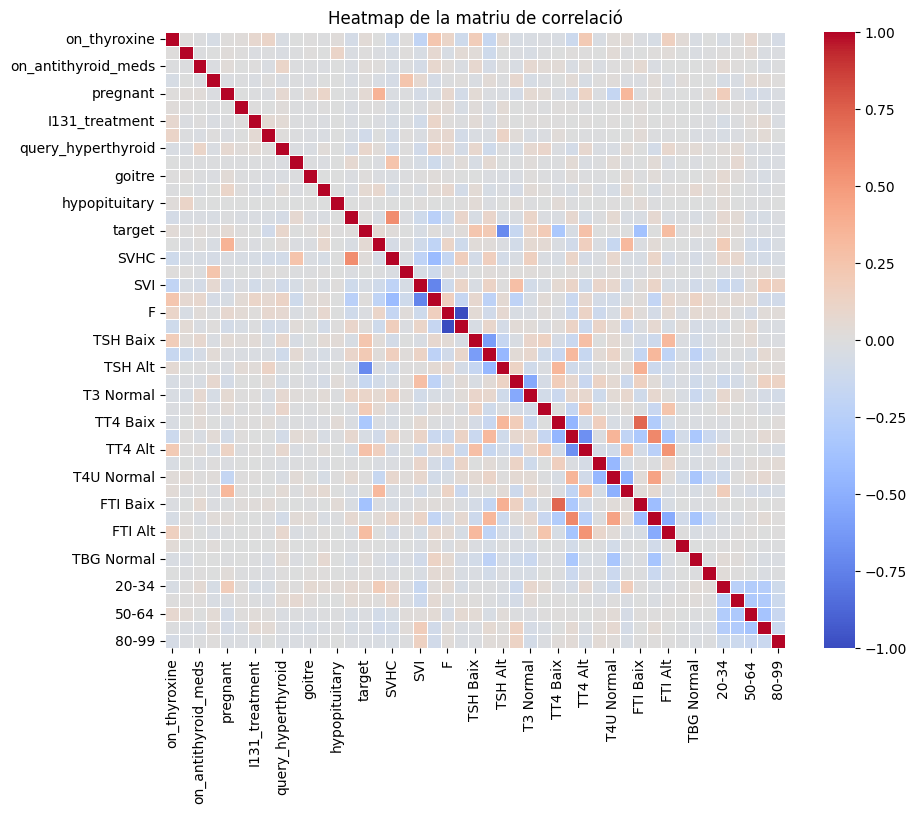

In [190]:
correlation_matrix = df_intervals.corr(method='pearson', min_periods=1, numeric_only=False)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5) 
plt.title('Heatmap de la matriu de correlació')
plt.show()

In [191]:
attributes = [k for k in df_intervals.keys() if k!= target_att]
X = df_intervals[attributes]
y = df_intervals[[target_att]]
X_train_val_intervals, X_test_intervals, y_train_val_intervals, y_test_intervals = train_test_split(X, y, test_size=0.1, random_state=42)


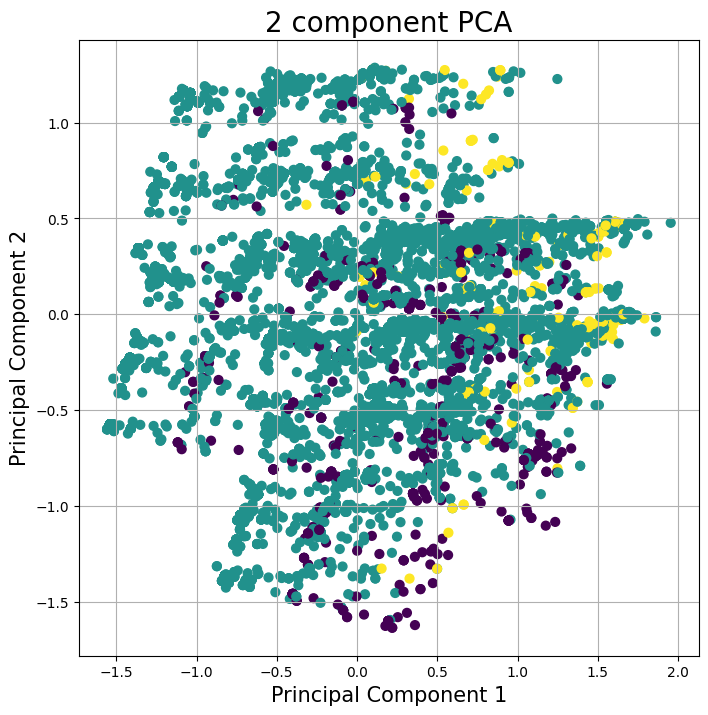

In [192]:
pca = PCA(n_components=2)
y_pca = np.array(y_train_val_intervals)
X_data_pca_2 = pca.fit_transform(X_train_val_intervals)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(X_data_pca_2[:,0], X_data_pca_2[:,1],c = y_pca[:], s = 40, cmap='viridis')
ax.grid()

In [193]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_intervals, y_train_val_intervals, test_size=0.2, random_state=42)
ovo_model = RandomForestClassifier()
ovo_model.fit(X_train, y_train)
y_pred = ovo_model.predict(X_val)

cm = confusion_matrix(y_val, y_pred)

print(f1_score(y_val,y_pred,average='macro'))
print(accuracy_score(y_val,y_pred))
print("Matriu de confusió:\n", cm)


0.8587523128506768
0.9711779448621554
Matriu de confusió:
 [[ 126    9    0]
 [  14 1400    7]
 [   0   16   24]]


In [194]:
PRC = 0.3
f1_intervals = classificacio_per_defecte(X_train_val_intervals,y_train_val_intervals,PRC,10,base_classifiers)
save_df(f1_intervals,'df_interval',base_classifiers)
f1_intervals = pd.read_csv('./execucions/resultats_per_model_default_df_interval.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


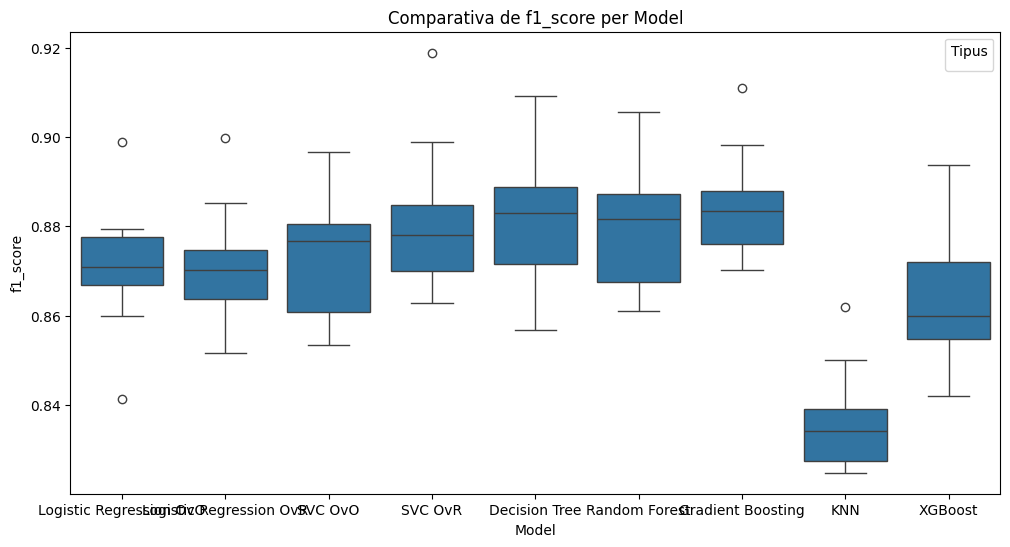

In [195]:
plot_data(f1_intervals)

In [196]:
#cerca_hyperparametres(X_train_val_intervals,y_train_val_intervals,base_classifiers,10,'df_intervals',param_grid_list)

In [197]:
best_model_dfna.fit(X_train_val_fillna,y_train_val_fillna)
y_pred = best_model_dfna.predict(X_test_fillna)

cm = confusion_matrix(y_test_fillna, y_pred)

print(f1_score(y_test_fillna,y_pred,average='macro'))
print(f1_score(y_test_fillna,y_pred,average='micro'))
print(accuracy_score(y_test_fillna,y_pred))
print("Matriu de confusió:\n", cm)

0.9500763326850282
0.9909604519774011
0.9909604519774011
Matriu de confusió:
 [[ 69   0   0]
 [  2 788   4]
 [  0   2  20]]


In [198]:
best_model_intervals = get_best_model_cerca_hyperparametres(base_classifiers,'df_intervals')
best_model_intervals

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [199]:
best_model_intervals.fit(X_train_val_intervals,y_train_val_intervals)
y_pred = best_model_intervals.predict(X_test_intervals)

cm = confusion_matrix(y_test_intervals, y_pred)

print(f1_score(y_test_intervals,y_pred,average='macro'))
print(f1_score(y_test_intervals,y_pred,average='micro'))
print(accuracy_score(y_test_intervals,y_pred))
print("Matriu de confusió:\n", cm)

0.8911720169288869
0.979706877113867
0.979706877113867
Matriu de confusió:
 [[ 73   2   0]
 [  6 782   5]
 [  0   5  14]]
